## DeepDive_7749394
Weitere Informationen finden sich in der Dokumentation **Doku_7749394.pdf** auf dem GitHub-Repository

## Vorbereitungen
Importieren der Packages

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\z0125382\appdata\local\programs\python\python311\lib\site-packages (0.13.0)




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from IPython.display import display, clear_output
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import importlib

In [6]:
import tensorflow as tf        
print('Tensorflow version:', tf.__version__, '(Expected 2.7.0)')

Tensorflow version: 2.14.0 (Expected 2.7.0)


## Loading the MNIST-Dataset

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

 Plot of the first 25 samples in the MNIST training set


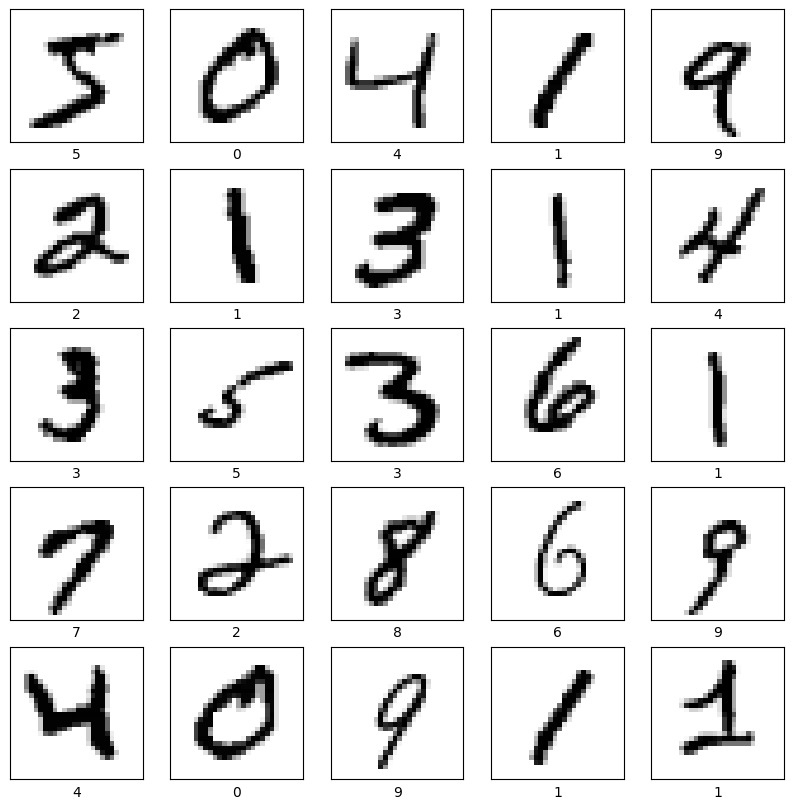

In [7]:
# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Plotting data samples
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [8]:

# Pixelwerte normalisieren auf Bereich [0,1]
x_train_normalized = x_train/255 
x_test_normalized = x_test/255 

# in the next step, we also need to reshape our input to fit our input layer later on. 
# This is due to keras expecting a definition for how many channels your input sample has, as we 
# deal with gray scale this is 1.
x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)


In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_test.shape

(10000, 28, 28, 1)

## Designing the neural network architecture


In [11]:
marvin = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28,28,1)),
  tf.keras.layers.RandomRotation(0.06),
  tf.keras.layers.RandomZoom(0.02),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
marvin.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRot  (None, 28, 28, 1)         0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                        

## Designing the neural network training

In [13]:

# Define your loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


#print(-tf.math.log(1/10))

sampleID = 100
loss_fn(y_train[:1], marvin(x_train[sampleID-1:sampleID]).numpy()).numpy()




2.3000784

In [14]:
marvin.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train, the model

In [15]:
# import datetime
# import os
# %load_ext tensorboard


# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [16]:
learning_history = marvin.fit(
    x_train,
    y_train,
    epochs= 25,
    batch_size= 64,
    validation_data=(x_test, y_test)
    # callbacks=[tensorboard_callback]
)


Epoch 1/25


c:\Users\Z0125382\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 120s 120ms/step - loss: 0.5390 - accuracy: 0.8347 - val_loss: 0.0688 - val_accuracy: 0.9766
Epoch 2/25
938/938 [==============================] - 120s 128ms/step - loss: 0.1765 - accuracy: 0.9513 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 3/25
938/938 [==============================] - 103s 110ms/step - loss: 0.1314 - accuracy: 0.9647 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 4/25
938/938 [==============================] - 98s 104ms/step - loss: 0.1069 - accuracy: 0.9708 - val_loss: 0.0417 - val_accuracy: 0.9887
Epoch 5/25
938/938 [==============================] - 96s 103ms/step - loss: 0.0953 - accuracy: 0.9756 - val_loss: 0.0772 - val_accuracy: 0.9776
Epoch 6/25
938/938 [==============================] - 102s 109ms/step - loss: 0.0871 - accuracy: 0.9766 - val_loss: 0.0376 - val_accuracy: 0.9876
Epoch 7/25
938/938 [==============================] - 152s 162ms/step - loss: 0.0743 - accuracy: 0.9799 - val_loss: 0.0327 - val_accuracy

In [17]:
# This line would start up tensorboard for you
# %tensorboard --logdir logs

In [18]:

# after the training finishes, we will also save Marvin in Keras style (HDF5), so we do not have to 
# train him again
# every time we start our computer. Obviously, by changing the model_name, you can also save different
# configurations of Marvin. The name has to be a string, like this: 'name.h5'
model_name = 'marvin.h5'
marvin.save(model_name, save_format='h5')

# It is best practice to indicate what configuration changes you did within the name, so you know
# which model you need to load already from its name
# Let's say instead of a learning rate of 0.001 you used 0.1, your naming could then look like:
# 'marvin_lr01.h5'

print('Success! You saved Marvin as: ', model_name)

Success! You saved Marvin as:  marvin.h5


c:\Users\Z0125382\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Plot the Accuracy and Loss-function

In [19]:
def draw_learning_curve(history, keys=['accuracy', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sn.lineplot(x = history.epoch, y = history.history[key])
        sn.lineplot(x = history.epoch, y = history.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'], loc='best')
    plt.show()

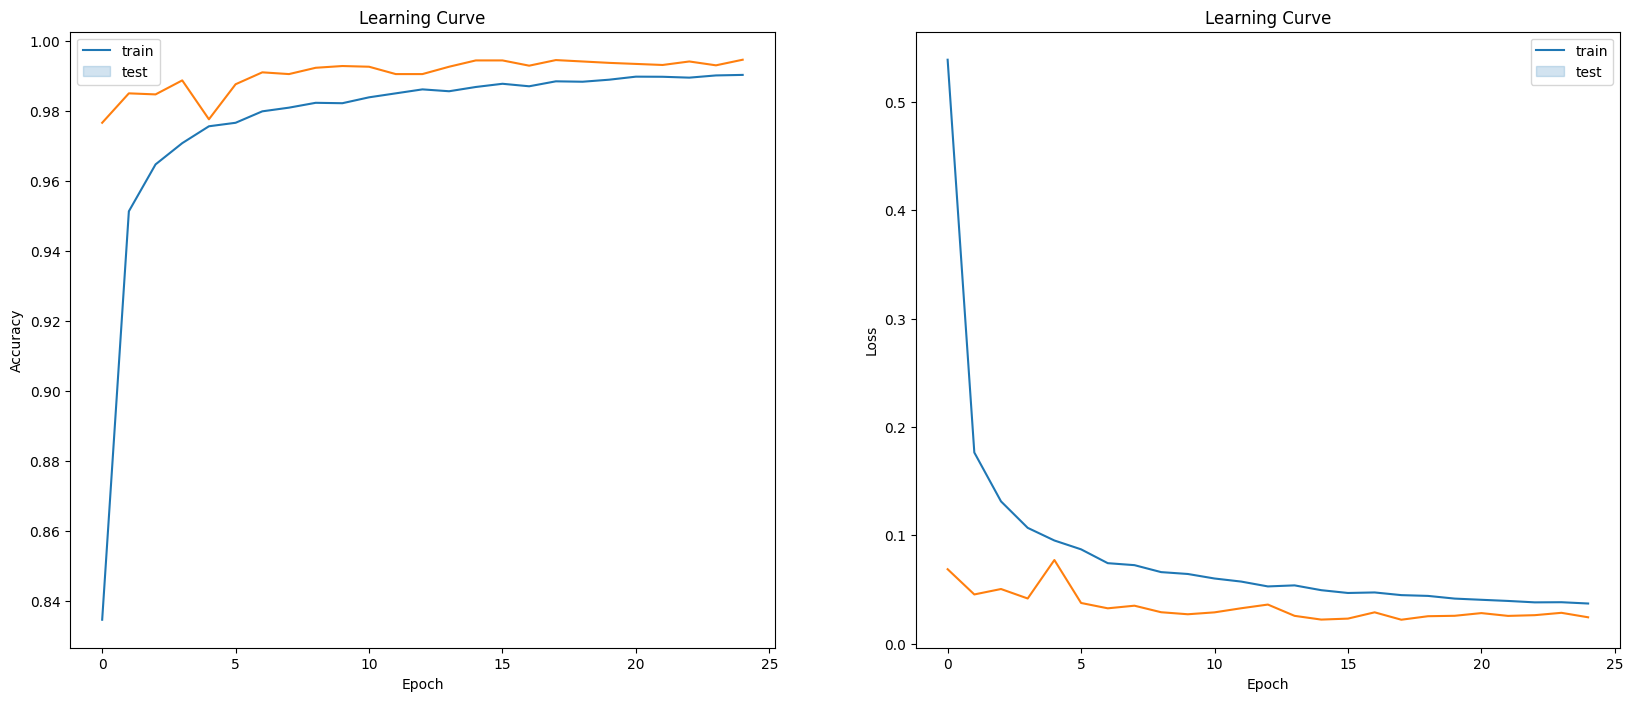

In [20]:
draw_learning_curve(learning_history)


## Evaluating Marvin

### The Intuitive Approach

We will start with the intuition building approach. The following code will plot the image samples. The caption below is Marvin's prediction. If he is right, the sample will get a greenish touch. If he is wrong, a reddish one. Try to answer the above questions with the results from the intuitive plot you will generate below.

In [21]:

# load a saved marvin configuration you want to evaluate
model_name = 'marvin.h5'
marvin_reloaded = tf.keras.models.load_model(model_name)

# Let Marvin predict on the test set, so we have some data to evaluate his performance.
predictions = marvin_reloaded.predict([x_test])

# Remember that the prediction of Marvin is a probability distribution over all ten-digit classes
# We want him to assign the digit class with the highest probability to the sample.
predictions = np.argmax(predictions, axis=1)
#pd.DataFrame(predictions)


313/313 [==============================] - 4s 12ms/step


In [22]:
(test_loss, test_acc) = marvin_reloaded.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ",test_acc)

c:\Users\Z0125382\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 5s 14ms/step - loss: 0.0244 - accuracy: 0.9946
Loss:  0.024381529539823532
Accuracy:  0.9945999979972839


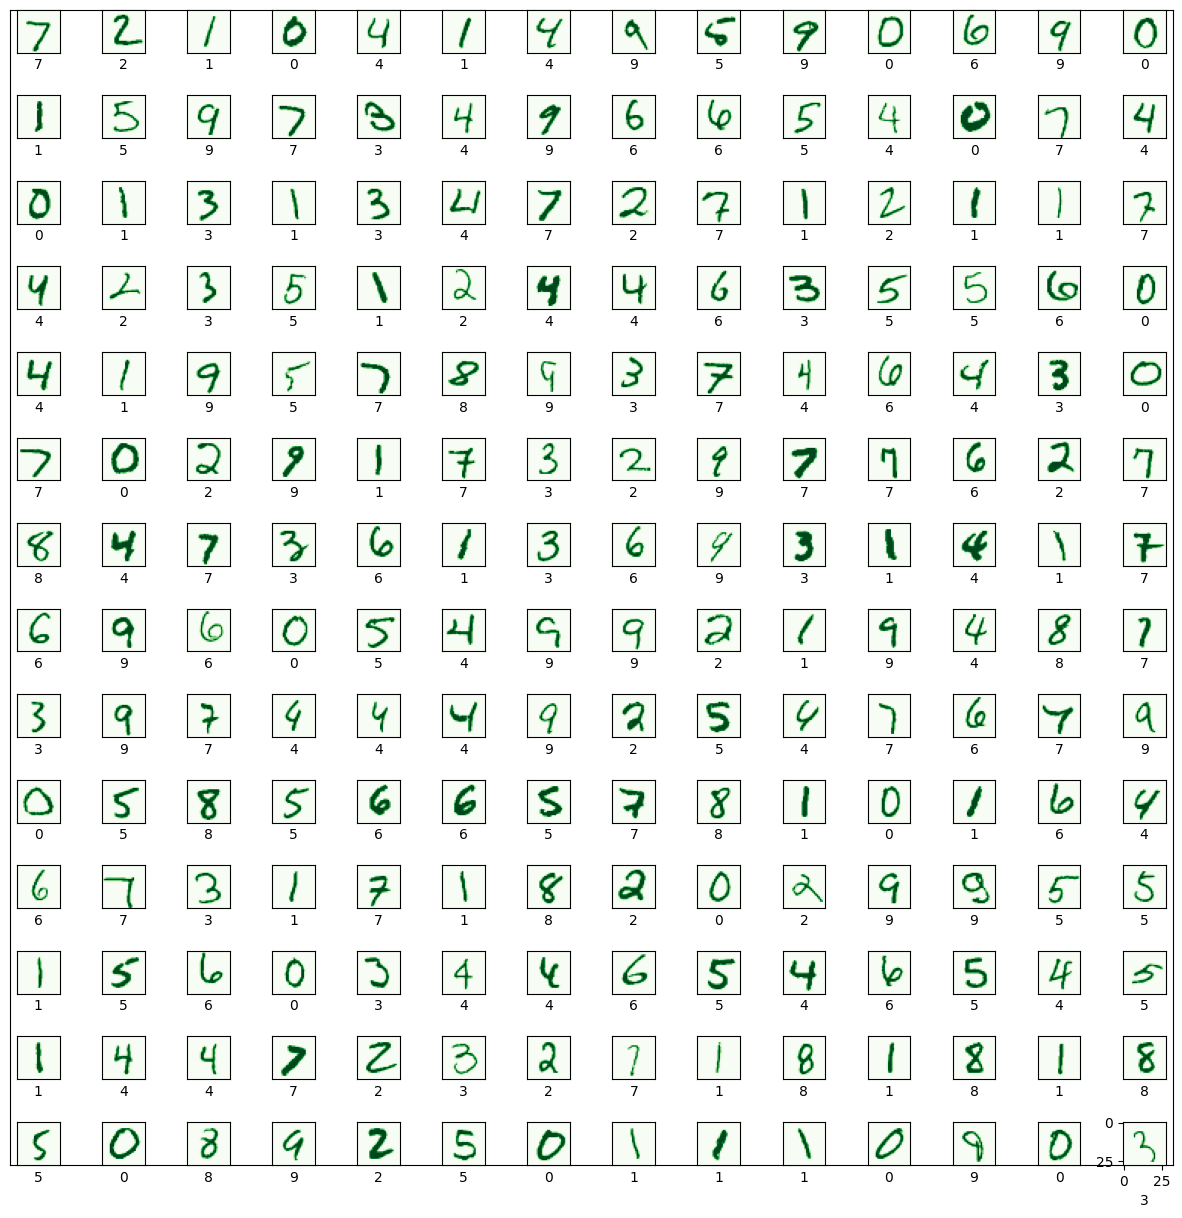

In [23]:

# Plot for the intuitive approach

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

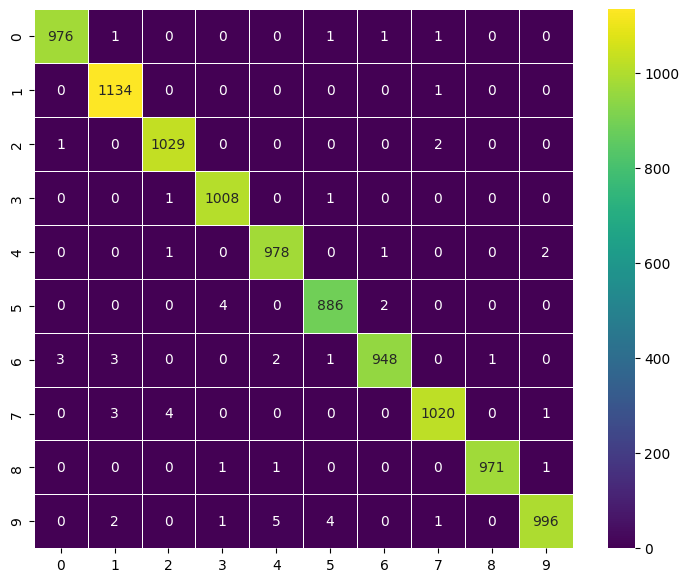

In [24]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()